## Problem 1

In [9]:
import pickle
with open('oil.dat','rb') as f:
    op = pickle.load(f)
import matplotlib.pyplot as plt

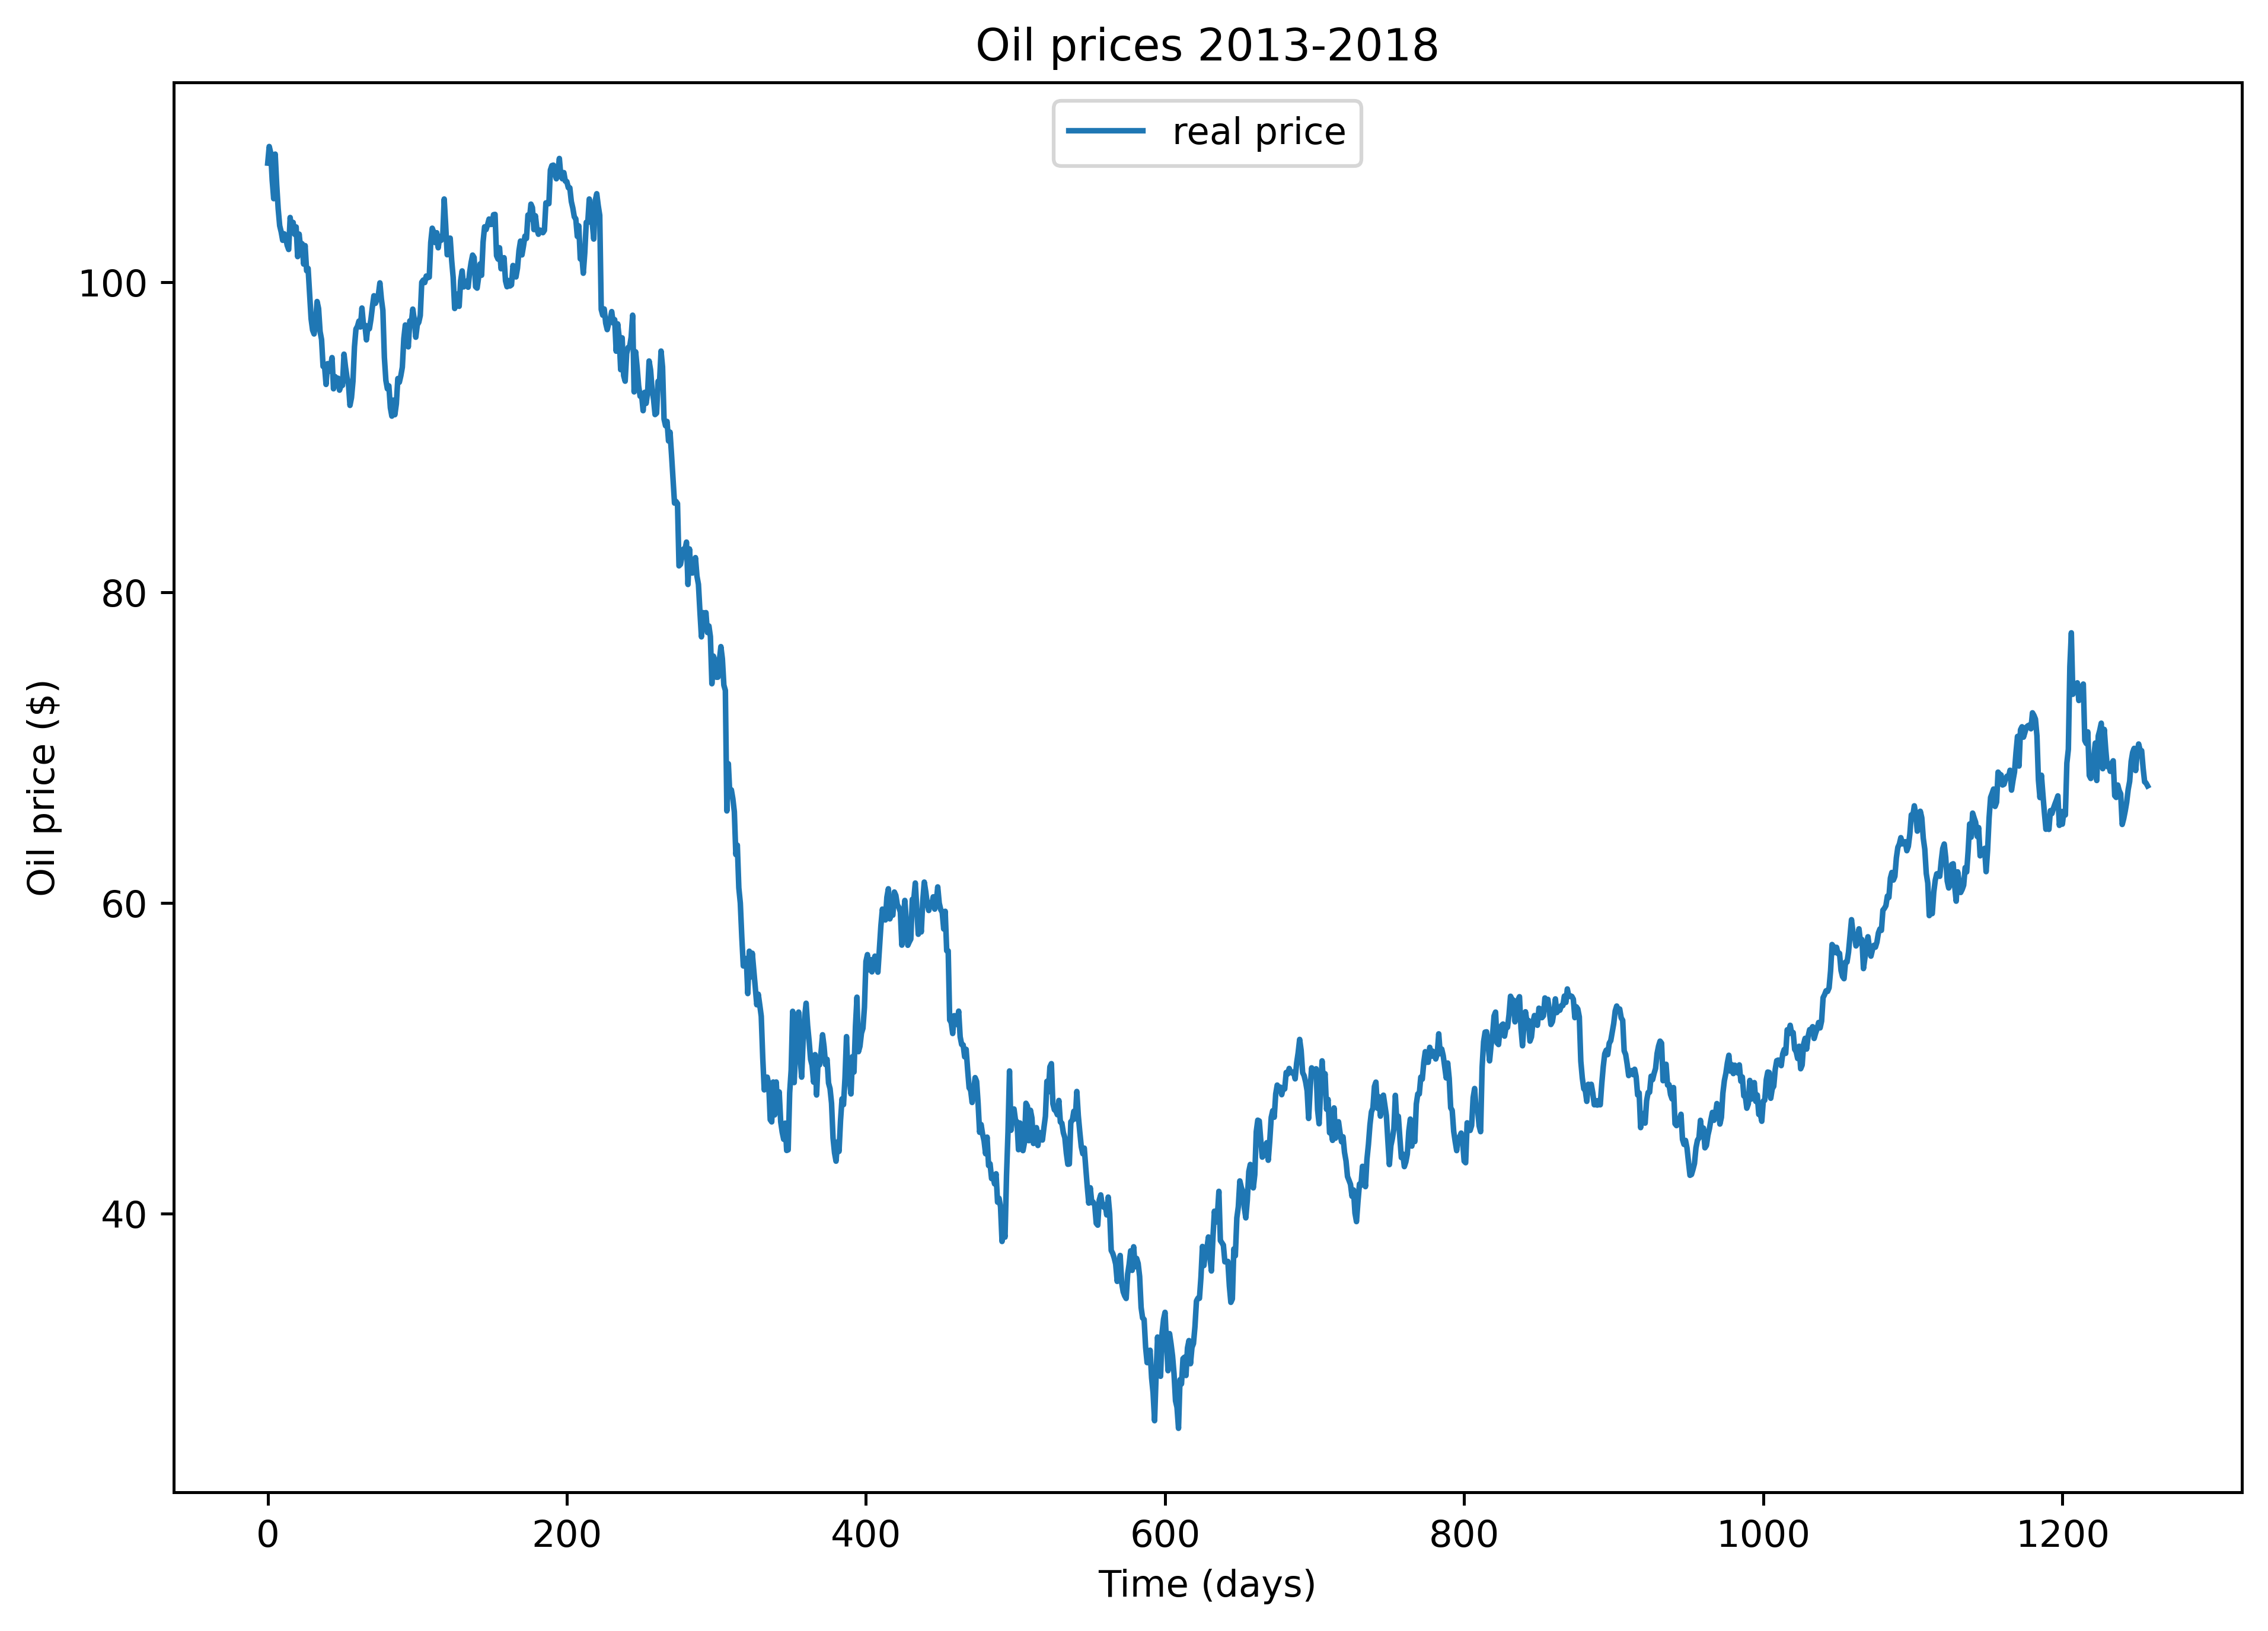

In [33]:
t = list(range(len(op)))
fig = plt.figure(num='simple_line_plot', figsize=(10,7), dpi=450)
ax = fig.add_subplot(1, 1, 1) 
ax.plot(t, op, label = 'real price')
ax.legend(loc='upper center', fontsize=10, ncol=2)
ax.set_title('Oil prices 2013-2018', fontsize=12)
ax.set(xlabel='Time (days)',ylabel='Oil price ($)') 
plt.close(fig)
fig

## Problem 2

In [136]:
f = open('v13_map_uniquebyPSN.txt', 'rt')
v_13 = f.read()
f.close()

In [137]:
v_13 = v_13.split('\n')[:-1]

In [138]:
key_vals = [st.split('\t')for st in v_13]
keys = key_vals[0]


In [139]:
ls_dict = [{'#SampleID':'#SampleID',
 'RSID':'RSID', 'visitno':'visitno', 'sex':'sex', 'RUNCENTER':'RUNCENTER', 'HMPbodysubsite':'HMPbodysubsite', 'Description':'Description'}]

In [140]:
temp_dict = {}
temp_dict.update({keys[0]:key_vals[1][0]})
temp_dict.update({keys[1]:key_vals[1][1]})

In [141]:
ls_dict = []
temp_dict = {}
for i in range(1,len(key_vals)):
    for j in range(7):
        temp_dict.update({keys[j]:key_vals[i][j]})
    #print(temp_dict)
    ls_dict.append(temp_dict)
    temp_dict = {}

In [142]:
sites = []
for i in ls_dict:
    if i['HMPbodysubsite'] not in sites:
        x = i['HMPbodysubsite']
        sites.append(x)
sites

['Stool',
 'Saliva',
 'Tongue_dorsum',
 'Hard_palate',
 'Buccal_mucosa',
 'Attached_Keratinized_gingiva',
 'Palatine_Tonsils',
 'Throat',
 'Supragingival_plaque',
 'Subgingival_plaque',
 'Anterior_nares',
 'Left_Retroauricular_crease',
 'Right_Retroauricular_crease',
 'Right_Antecubital_fossa',
 'Vaginal_introitus',
 'Mid_vagina',
 'Posterior_fornix',
 'Left_Antecubital_fossa']

In [143]:
bs = {}
for i in sites:
    bsc = 0
    for j in ls_dict:
        if j['HMPbodysubsite'] == i:
           bsc += 1
    bs[i] = bsc
bs

{'Stool': 191,
 'Saliva': 166,
 'Tongue_dorsum': 190,
 'Hard_palate': 183,
 'Buccal_mucosa': 186,
 'Attached_Keratinized_gingiva': 183,
 'Palatine_Tonsils': 190,
 'Throat': 176,
 'Supragingival_plaque': 192,
 'Subgingival_plaque': 188,
 'Anterior_nares': 169,
 'Left_Retroauricular_crease': 187,
 'Right_Retroauricular_crease': 188,
 'Right_Antecubital_fossa': 155,
 'Vaginal_introitus': 88,
 'Mid_vagina': 91,
 'Posterior_fornix': 90,
 'Left_Antecubital_fossa': 156}

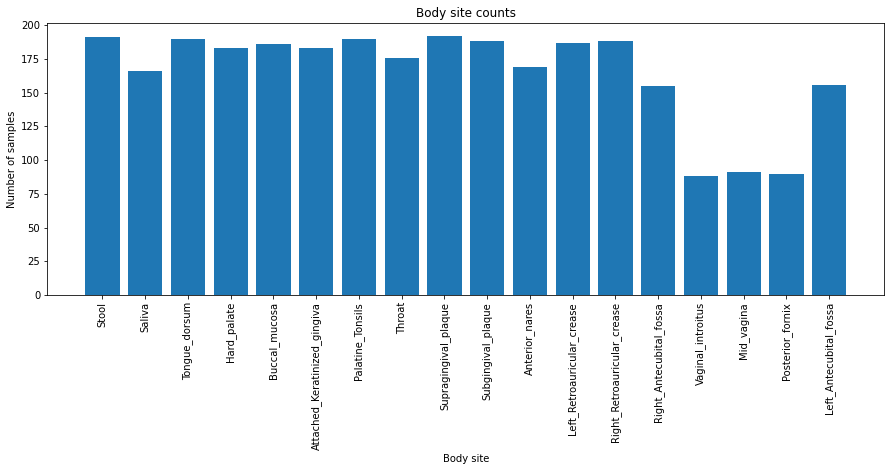

In [144]:
plt.figure(figsize=(15,5))
fig = plt.bar(range(len(bs)), list(bs.values()))
plt.xticks(range(len(bs)), list(bs.keys()), rotation=90)
plt.title('Body site counts', fontsize=12)
plt.xlabel("Body site")
plt.ylabel("Number of samples")

plt.show()

In [145]:
female = {}
gender = 'female'
for i in sites:
    bsc = 0
    for j in ls_dict:
        if j['HMPbodysubsite'] == i:
            if j['sex'] == gender:
                bsc += 1
    female[i] = bsc
male = {}
gender = 'male'
for i in sites:
    bsc = 0
    for j in ls_dict:
        if j['HMPbodysubsite'] == i:
            if j['sex'] == gender:
                bsc += 1
    male[i] = bsc

In [146]:
male


{'Stool': 98,
 'Saliva': 90,
 'Tongue_dorsum': 98,
 'Hard_palate': 95,
 'Buccal_mucosa': 96,
 'Attached_Keratinized_gingiva': 96,
 'Palatine_Tonsils': 98,
 'Throat': 91,
 'Supragingival_plaque': 99,
 'Subgingival_plaque': 97,
 'Anterior_nares': 94,
 'Left_Retroauricular_crease': 97,
 'Right_Retroauricular_crease': 99,
 'Right_Antecubital_fossa': 81,
 'Vaginal_introitus': 0,
 'Mid_vagina': 0,
 'Posterior_fornix': 0,
 'Left_Antecubital_fossa': 90}

In [147]:
female

{'Stool': 93,
 'Saliva': 76,
 'Tongue_dorsum': 92,
 'Hard_palate': 88,
 'Buccal_mucosa': 90,
 'Attached_Keratinized_gingiva': 87,
 'Palatine_Tonsils': 92,
 'Throat': 85,
 'Supragingival_plaque': 93,
 'Subgingival_plaque': 91,
 'Anterior_nares': 75,
 'Left_Retroauricular_crease': 90,
 'Right_Retroauricular_crease': 89,
 'Right_Antecubital_fossa': 74,
 'Vaginal_introitus': 88,
 'Mid_vagina': 91,
 'Posterior_fornix': 90,
 'Left_Antecubital_fossa': 66}

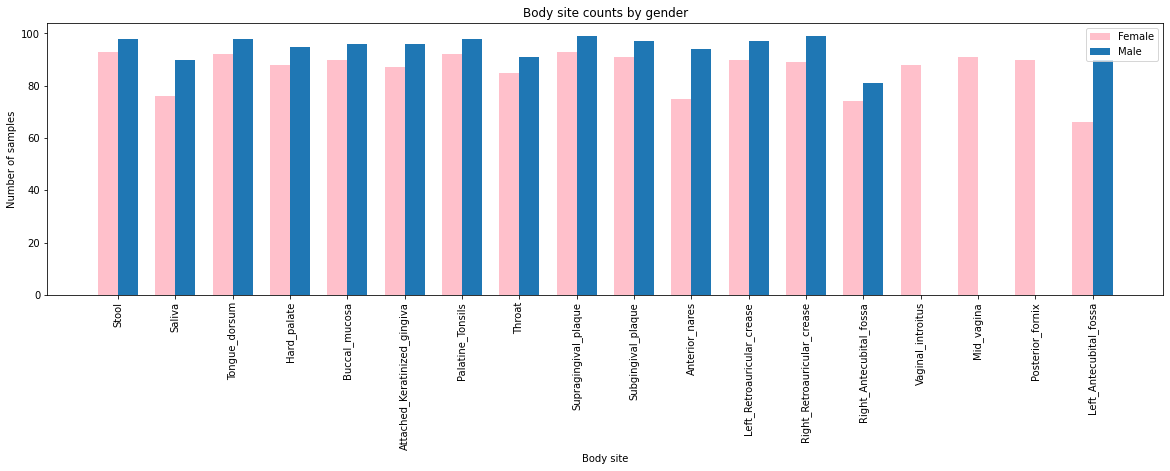

In [148]:
fig = plt.figure(figsize=(20,5))
width = 0.35       
ax = fig.add_subplot(111)
r1 = plt.bar(female.keys(), list(female.values()), -width, color = "pink", align='edge', label = 'Female')
r2 = plt.bar(male.keys(), list(male.values()), +width, align='edge', label='Male')
plt.xticks(range(len(female)), list(female.keys()), rotation=90)
plt.xticks(range(len(male)), list(male.keys()), rotation=90)
plt.title('Body site counts by gender', fontsize=12)
plt.xlabel("Body site")
plt.ylabel("Number of samples")
plt.legend()



plt.show()

## Problem 3

In [9]:
seq = []
with open('ecoli_genome(1).fasta', 'rt') as f:
    seq = [line.rstrip('\n') for line in f]


In [8]:
ec = ""
for i in range(1, len(seq)):
    ec += seq[i]
ec

'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAACCATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCTGCTGCGGTGCTGGCTGCCTGTTTACGCGCCGAT

In [11]:
import matplotlib.pyplot as plt


In [37]:
class dna_walker:
    def __init__(self):
        self.walk = []
        self.curr = 0
        self.chunk = ""
    def steps(self, start, count, st, prev=0):
        self.curr = prev
        self.walk = []
        self.chunk = ""
        for i in range(count):
            self.chunk += st[start+i]
        for j in self.chunk:
            if j == 'A' or j == 'T':
                self.curr += 1
            else:
                self.curr -=1
            self.walk.append(self.curr)
    def get_walk(self):
        #return the history of positions of the walker 
        return self.walk

In [70]:
w1 = dna_walker()
w1.steps(0,100,ec)
walk1 = w1.get_walk()
print(w1.get_walk())


[1, 0, -1, 0, 1, 2, 3, 2, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 12, 13, 12, 13, 12, 13, 12, 13, 12, 13, 14, 15, 14, 13, 14, 13, 12, 13, 14, 13, 14, 13, 14, 15, 14, 15, 14, 13, 14, 15, 16, 15, 14, 15, 14, 13, 12, 11, 12, 11, 12, 11, 12, 13, 14, 15, 16]


In [71]:
w1.steps(100,100,ec)
walk2 = w1.get_walk()
print(w1.get_walk())


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 11, 12, 11, 12, 13, 14, 13, 12, 13, 12, 13, 12, 13, 14, 15, 16, 17, 18, 17, 18, 19, 20, 21, 22, 21, 20, 21, 22, 23, 24, 25, 26, 25, 24, 23, 24, 25, 26, 25, 24, 23, 22, 23, 22, 23, 22, 23, 22, 23, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 31, 32, 31, 32, 31, 32, 33, 32, 33, 32, 33, 34, 33, 34, 35, 34, 33, 34, 35, 34, 35, 36, 37, 36, 35, 34, 35, 36]


In [72]:
w1.steps(200,100,ec)
walk3 = w1.get_walk()
print(w1.get_walk())

[1, 2, 1, 0, 1, 0, -1, 0, -1, -2, -1, 0, 1, 2, 1, 0, 1, 0, -1, 0, -1, -2, -1, 0, -1, 0, -1, -2, -1, 0, 1, 2, 1, 0, 1, 0, 1, 0, -1, 0, 1, 2, 1, 0, -1, 0, -1, -2, -3, -4, -5, -6, -5, -6, -5, -6, -7, -8, -9, -8, -7, -8, -7, -8, -9, -8, -7, -6, -7, -6, -7, -6, -7, -6, -5, -4, -3, -2, -1, -2, -3, -4, -5, -6, -7, -6, -7, -8, -7, -8, -7, -8, -7, -8, -7, -8, -9, -10, -11, -12]


Text(0.5, 1.0, 'Three random walks from e.coli sequence')

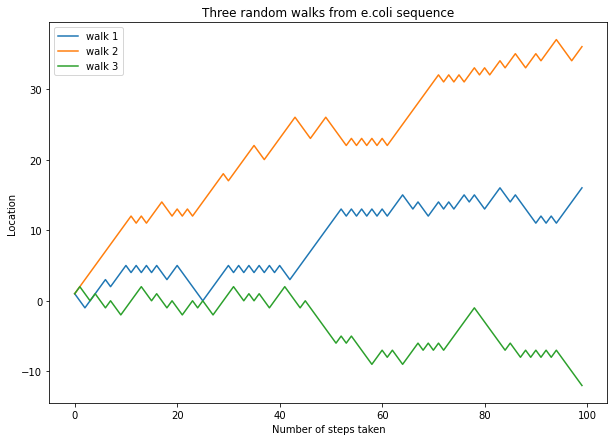

In [73]:
fig = plt.figure(figsize=(10,7))
plt.plot(walk1, label = "walk 1")
plt.plot(walk2, label = "walk 2")
plt.plot(walk3, label = "walk 3")
plt.legend()
plt.xlabel("Number of steps taken")
plt.ylabel("Location")
plt.title("Three random walks from e.coli sequence")

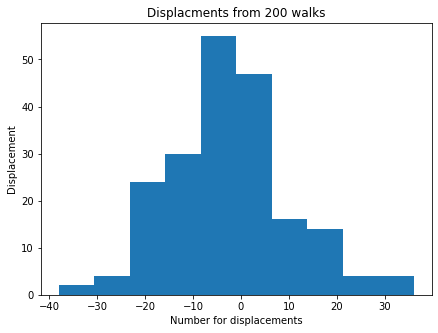

In [82]:
fig = plt.figure(figsize=(7,5))

start = 400
dis = []
for i in range(200): 
    w1.steps(start,100,ec,0)
    walk = w1.get_walk()
    start+=100
    dis.append(walk[-1])
plt.hist(dis)
plt.xlabel("Number for displacements")
plt.ylabel("Displacement")
plt.title("Displacments from 200 walks")
plt.show()


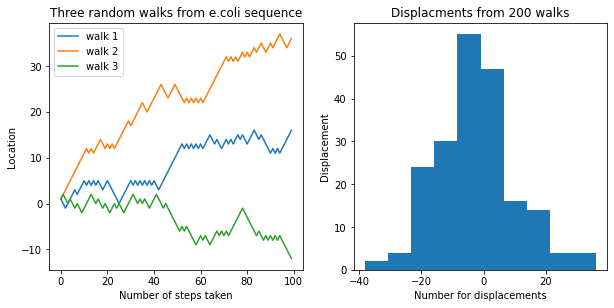

In [83]:
plt.subplot(2,2,1)
plt.plot(walk1, label = "walk 1")
plt.plot(walk2, label = "walk 2")
plt.plot(walk3, label = "walk 3")
plt.legend()
plt.xlabel("Number of steps taken")
plt.ylabel("Location")
plt.title("Three random walks from e.coli sequence")

plt.subplot(2,2,2)

start = 400
dis = []
for i in range(200): 
    w1.steps(start,100,ec,0)
    walk = w1.get_walk()
    start+=100
    dis.append(walk[-1])
plt.hist(dis)
plt.xlabel("Number for displacements")
plt.ylabel("Displacement")
plt.title("Displacments from 200 walks")
plt.show()
